In [1]:
import numpy as np
import autograd.numpy as anp
#from autograd import jacobian


import matplotlib.pyplot as plt
#import math
from scipy.optimize import least_squares
from scipy.optimize import root
#from scipy.optimize import fsolve
#import jax.numpy as jnp

In [2]:
#pip install matplotlib --upgrade

In [3]:
px = 15
py = 9
#c = 6
c = px*py - 4
ty = 11
tx = 15
Ly = 1
Lx = 10
epsx = Ly/(2*py)
epsy = Ly/(2*py)

N = (px-2)*(py - 2)
M_4x = px - 2
M_4y = py - 2
M = 2* M_4x + 2* M_4y
a = 2
b = 1
beta = Lx/Ly


weightss = 0*np.random.rand((2*(N+M)),1).reshape(-1)/(2*(N+M))
weights3 = 1*np.random.rand(3*(N+M),1).reshape(-1,1)/(1*(N+M))
#weights3 = np.ones_like(weights)
wx = weights3[:(N+M)].reshape(-1,1)
wy = weights3[(N+M):2*(N+M)].reshape(-1,1)
wp = weights3[2*(N+M):3*(N+M)].reshape(-1,1)
#weights3 /= np.sum(weights3)
rho = 1.0
mu = 1.0
vm = 1.0
Re = 1.0#Ly*vm*rho/mu
pm = 10
Eu = 1 #pm /(rho*vm**2) 
#weights3[:2*(N+M)] = resultado2.x.reshape(-1,1)
N+M
Re
weightss.shape

(262,)

In [4]:
weights3[:N+M].shape

(131, 1)

In [5]:
def euclidian_distance(x,y,xyk,c):
    matrix = np.zeros([len(x)*len(y) ,c])
    number_matrix = np.zeros([len(x)*len(y),2])
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i
            m = j + i*len(y)
            matrix[m,:] = np.sqrt(np.square(x[n]- xyk[:,0])  + np.square(y[j] - xyk[:,1])) + (2.2250738585072014e-308)**(1/(2*a))
            number_matrix[m,0] = x[n]
            number_matrix[m,1] = y[j]
    return matrix, number_matrix

def points(x,y):
    matrix = np.zeros([len(x)*len(y),2])
    boundary = np.zeros([2*len(y)-4 + 2 * len(x),2])
    interior = np.zeros([(len(x) - 2) * (len(y)-2),2])
    h, u = 0,0
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i#%len(x)
            m = j + i*len(y)
            matrix[m,0] = x[n]
            matrix[m,1] = y[j]
        
            if n == 0 or n == len(x)-1 or j == 0 or j == len(y)-1:
                
                boundary[h,0] = x[n]
                boundary[h,1] = y[j]
                h+=1
            else:
                interior[u,0] = x[n]
            
                interior[u,1] = y[j]
                u+=1
    return matrix, boundary, interior

In [6]:
x = np.linspace(0,Lx,px)
y = np.linspace(0,Ly,py)

X,Y = np.meshgrid(x,y)

#Puntos internos

x_int = np.linspace(epsx,Lx - epsx,px-2)
y_int =  np.linspace(epsy,Ly - epsy,py-2)
Xin,Yin = np.meshgrid(x_int,y_int)

#Puntos en las fronteras:
xf1, yf1 = (x_int, np.zeros(1)) # f(x,0) 
X1,Y1 = np.meshgrid(xf1 , yf1)
xf2,yf2 = (x_int, np.ones(1)*Ly) # f(x,L)
X2,Y2 = np.meshgrid(xf2 , yf2)
xf3,yf3 = (np.zeros(1), y_int ) #f(0,y)
X3,Y3 = np.meshgrid(xf3 , yf3)
xf4,yf4 = (np.ones(1)*Lx,y_int) #f(L,y)
X4,Y4 = np.meshgrid(xf4,yf4)

#Centros


xk = points(x_int,y_int)[0][:,0].reshape(-1,1)
yk = points(x_int,y_int)[0][:,1].reshape(-1,1)

xyk1 = np.concatenate((xk,yk),axis = 1)
xykf1 = np.concatenate((xf1.reshape(-1,1), np.zeros_like(xf1).reshape(-1,1)),axis = 1)
xykf2 = np.concatenate((xf2.reshape(-1,1), np.ones_like(xf2).reshape(-1,1)*Ly),axis = 1)
xykf3 = np.concatenate((np.zeros_like(yf3).reshape(-1,1),yf3.reshape(-1,1)),axis = 1)
xykf4 = np.concatenate((np.ones_like(yf4).reshape(-1,1)*Lx,yf4.reshape(-1,1)),axis = 1)
xyk1 = np.concatenate((xyk1,xykf1,xykf2,xykf3,xykf4),axis = 0)

#Puntos test
x_test = np.linspace(0,Lx,tx)
y_test = np.linspace(0,Ly,ty)
Xt,Yt = np.meshgrid(x_test,y_test)
x_vector = points(x_int,y_int)[0][:,0].reshape(-1,1)
y_vector = points(x_int,y_int)[0][:,1].reshape(-1,1)
x_vector.shape
x_v2 = euclidian_distance(x,y,xyk1,c)


x_vector.shape

(91, 1)

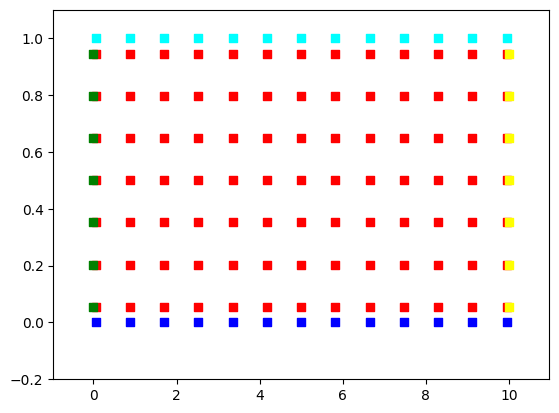

In [7]:
#Plot the colocation points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-0.3 - Lx/px,Lx + Lx/px + 0.3 ])
ax.set_ylim([-0.2,Ly*1.1])
ax.scatter(Xin,Yin,marker='s', color='red')
ax.scatter(X1,Y1,marker='s', color = 'blue')

ax.scatter(X2,Y2,marker='s', color = 'cyan')
ax.scatter(X3,Y3,marker='s', color = 'green')
ax.scatter(X4,Y4,marker = 's' ,color = 'yellow')
#ax.scatter(xyk1[:,0],xyk1[:,1], color = 'black')
plt.show()

In [8]:
#Quitamos esquinas
#xk = points(x_c,y_c)[0][:,0].reshape(-1,1)
#yk = points(x_c,y_c)[0][:,1].reshape(-1,1)
#c = len(x_int)
#xyk1 = np.concatenate((xk,yk),axis = 1)
#xyk1 = np.delete(xyk1, [0,px-1,px*(py-1),px*py-1], axis = 0)
#xyk1.shape
XC, YC = np.meshgrid(xyk1[:,0],xyk1[:,1])

In [9]:
xyk1.shape

(131, 2)

In [10]:
def tps_rbf(euclidian_distance,a=a,b=b):
    #if euclidian_distance == 0:
    #    return 0
    #else:
    return (euclidian_distance*b)**(2*a) *np.log(b*euclidian_distance) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdx(x_vector,euclidian_distance,a=a,b=b):
        return (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)# #euclidian_distance + 1e-10 to avoid singularity at zero  
    
def tpsdy(y_vector,euclidian_distance,a=a,b=b):
        return (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1) /(euclidian_distance) * (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1)) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdxx(x_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)
                        + ((x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) + 1) + 2*a))

def tpsdyy(y_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance ) + 1)
                        + ((y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) +1) +2*a))
  

In [11]:
euclidian_dist_complete = euclidian_distance(x,y,xyk1,c)[0]
euclidian_dist_int = euclidian_distance(x_int,y_int,xyk1,c)[0]
euclidian_dist_centers = euclidian_distance(xyk1[:,0],xyk1[:,1],xyk1,c)[0]



euclidian_dist_border1 = euclidian_distance(xf1,yf1,xyk1,c)[0]
euclidian_dist_border2 = euclidian_distance(xf2,yf2,xyk1,c)[0]
euclidian_dist_border3 = euclidian_distance(xf3,yf3,xyk1,c)[0]
euclidian_dist_border4 = euclidian_distance(xf4,yf4,xyk1,c)[0]

euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]
euclidian_dist_border3.shape

(7, 131)

In [12]:
euclidian_dist_int.shape

(91, 131)

In [13]:
x_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,0]
y_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,1]
euclidian_dist_int
i , j = np.where(euclidian_dist_int == 0)
i
x_vector_int

array([0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.05555556,
       0.05555556, 0.05555556, 0.87962963, 0.87962963, 0.87962963,
       0.87962963, 0.87962963, 0.87962963, 0.87962963, 1.7037037 ,
       1.7037037 , 1.7037037 , 1.7037037 , 1.7037037 , 1.7037037 ,
       1.7037037 , 2.52777778, 2.52777778, 2.52777778, 2.52777778,
       2.52777778, 2.52777778, 2.52777778, 3.35185185, 3.35185185,
       3.35185185, 3.35185185, 3.35185185, 3.35185185, 3.35185185,
       4.17592593, 4.17592593, 4.17592593, 4.17592593, 4.17592593,
       4.17592593, 4.17592593, 5.        , 5.        , 5.        ,
       5.        , 5.        , 5.        , 5.        , 5.82407407,
       5.82407407, 5.82407407, 5.82407407, 5.82407407, 5.82407407,
       5.82407407, 6.64814815, 6.64814815, 6.64814815, 6.64814815,
       6.64814815, 6.64814815, 6.64814815, 7.47222222, 7.47222222,
       7.47222222, 7.47222222, 7.47222222, 7.47222222, 7.47222222,
       8.2962963 , 8.2962963 , 8.2962963 , 8.2962963 , 8.29629

In [14]:
euclidian_dist_int.shape
#px*py

(91, 131)

In [15]:
gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(yf4)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(yf4,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(yf4)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(yf4,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)

gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(yf3),euclidian_dist_border3)
gyy_b3 = tpsdyy(yf3,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(yf3),euclidian_dist_border3)
gy_b3 = tpsdy(yf3,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)
gb4 = tps_rbf(euclidian_dist_border4)

gxx_b2 = tpsdxx(xf2,euclidian_dist_border2)
gxx_b1 = tpsdxx(xf1,euclidian_dist_border1)
gyy_b2 = tpsdyy(np.ones_like(xf2)*Ly,euclidian_dist_border2)
gyy_b1 = tpsdyy(np.zeros_like(xf1),euclidian_dist_border1)

gy_b2 = tpsdy(np.ones_like(xf2)*Ly,euclidian_dist_border2)
gy_b1 = tpsdy(np.zeros_like(xf1),euclidian_dist_border1)


print(gb1.shape)

(13, 131)


In [16]:
phidphidx = np.array([(g_int[i,:].reshape(-1,1) @ gx_int[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int))])
phidphidy = np.array([(g_int[i,:].reshape(-1,1) @ gy_int[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int))])

phidphidx_b3 = np.array([(gb3[i,:].reshape(-1,1) @ gx_b3[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3))])
phidphidy_b3 = np.array([(gb3[i,:].reshape(-1,1) @ gy_b3[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3))])
phidphidx_b4 = np.array([(gb4[i,:].reshape(-1,1) @ gx_b4[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4))])
phidphidy_b4 = np.array([(gb4[i,:].reshape(-1,1) @ gy_b4[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4))])

phidphidx.shape


(91, 17161)

In [17]:
wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
g_int.shape
#wx.shape
#weights3.shape[0]/3
#wx.shape
#gxx_int.shape
#( 1/Re*(-np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) )

(91, 131)

In [18]:
wx = weights3[:((N+M))].reshape(-1,1)
wy = weights3[((N+M)):2*((N+M))].reshape(-1,1)
wp = weights3[2*((N+M)):3*((N+M))].reshape(-1,1)
wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    #weights = np.concatenate((wx,wxiwxj,wyiwxj,wy,wxiwyj,wyiwyj),axis = 0)
    #print(wp[-1])
    

    #Ecuaiones diferenciales en puntos internos
        #Ecuacion en x
F_01 =  1*( 1/Re*(-np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) + Eu*np.dot(gx_int,wp) + np.dot(phidphidx,wxiwxj) + np.dot(phidphidy,wyiwxj)).flatten()
        #   Ecuacione en y
F_02 = 1*( 1/Re*(-np.dot(gxx_int,wy) - np.dot(gyy_int,wy)) + Eu*np.dot(gy_int,wp) + np.dot(phidphidx,wxiwyj) + np.dot(phidphidy,wyiwyj)).flatten()
        #Ecuacion de continuidad
F_03 = 1*(np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()
    
    #Condiciones de frontera
    
        # Condiciones de ux
F_04 = 1*( np.dot( gb2 , wx ) ).flatten()
F_05 = 1*(np.dot(gb1,wx)).flatten()
F_06 = 1*(np.dot(gb3,wx) - 1.0/vm).flatten()

    
        #Condiciones de uy
F_07 = 1*(np.dot(gb2,wy)).flatten() 
F_08 = 1*(np.dot(gb1,wy)).flatten()
F_09 = 1*(np.dot(gb3,wy)).flatten()

    #Condiciones de p
F_010 = 1*(np.dot(gb3,wp)).flatten()
#Ecuaciones diferenciales en las fronteras
    #Ecuaciones en frontera de salida
F_011 = 1*(np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
F_012 = 1*(np.dot(gx_b4,wy)).flatten()
F_013 = 1*( 1/Re*(-np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) + Eu*np.dot(gx_b4,wp) + np.dot(phidphidx_b4,wxiwxj) + np.dot(phidphidy_b4,wyiwxj)).flatten()
    #Ecuacion en frontera superior
F_014 = 1*( 1/Re*(-np.dot(gxx_b2,wy) - np.dot(gyy_b2,wy)) + Eu*np.dot(gy_b2,wp)).flatten()
    #Ecuacion en frontera inferior
F_015 = 1*( 1/Re*(-np.dot(gxx_b1,wy) - np.dot(gyy_b1,wy)) + Eu*np.dot(gy_b1,wp)).flatten()

In [19]:
def NavierStokess(weightss):
    #print('Re = ',Re)
    wx = weightss[:((N+M))].reshape(-1,1)
    wy = weightss[((N+M)):2*((N+M))].reshape(-1,1)
    
    wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
    wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
    wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
    wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    
    F = np.zeros(((3*N+ 4*(M_4x) + 6*(M_4y)),))
    
    #Ecuaiones diferenciales en puntos internos
    #Ecuacion en x
    F[0:N] +=  1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) + (-pm)/beta 
                       + np.dot(phidphidx,wxiwxj)/beta + np.dot(phidphidy,wyiwxj)
                       ).flatten()
        #   Ecuacione en y
    F[N:2*N] += 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_int,wy) - np.dot(gyy_int,wy)) 
                   + 0 + np.dot(phidphidx,wxiwyj)/beta + np.dot(phidphidy,wyiwyj)
                   ).flatten() 
        #Ecuacion de continuidad8u9
    F[2*N:3*N] += 2*(np.dot(gx_int,wx)/beta + np.dot(gy_int,wy)).flatten()#/F_03.mean()


    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida  
    F[ 3*N + 4 * ( M_4x ) :  3*N + 4 * ( M_4x ) + (M_4y)] = 2*(np.dot(gx_b4,wx)/beta + np.dot(gy_b4,wy)).flatten()#/F_011.mean()
    F[3*N + 4 * ( M_4x ) + 1 * (M_4y):3*N + 4 * ( M_4x ) + 2 * (M_4y)] = 2*(np.dot(gx_b3,wx)/beta + np.dot(gy_b3,wy)).flatten()
    F[3*N + 4 * ( M_4x ) + 2 * (M_4y):3*N + 4 * ( M_4x ) + 3 * (M_4y) ] = 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) + 1*(-pm)/beta
                                                                                 + np.dot(phidphidx_b4,wxiwxj)/beta + np.dot(phidphidy_b4,wyiwxj)
                                                                                 ).flatten()#/F_013.mean()
    F[3*N + 4 * ( M_4x ) + 3 * (M_4y):3*N + 4 * ( M_4x ) + 4 * (M_4y)] = 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_b3,wx) - np.dot(gyy_b3,wx)) + 1*(-pm)/beta
                                                                                + np.dot(phidphidx_b3,wxiwxj)/beta + np.dot(phidphidy_b3,wyiwxj)
                                                                                 ).flatten()#/F_013.mean()
    F[3*N + 4 * ( M_4x ) + 4 * (M_4y):3*N + 4 * ( M_4x ) + 5 * (M_4y)] = 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)) 
                                                                             + np.dot(phidphidx_b4,wxiwyj)/beta + np.dot(phidphidy_b4,wyiwyj) 
                                                                             ).flatten()#/F_014.mean()
    F[3*N + 4 * ( M_4x ) + 5 * (M_4y):3*N + 4 * ( M_4x ) + 6 * (M_4y)] = 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_b3,wy) - np.dot(gyy_b3,wy)) 
                                                                            + np.dot(phidphidx_b3,wxiwyj)/beta + np.dot(phidphidy_b3,wyiwyj) 
                                                                            ).flatten()#/F_015.mean()
        #Condiciones de frontera
    
        # Condiciones de ux
    F[3*N  : 3*N +  M_4x] = 1*( np.dot( gb2 , wx ) ).flatten()#/F_04.mean()
    F[3*N + ( M_4x): 3*N + 2 * ( M_4x)] = 1*(np.dot(gb1,wx)).flatten()#/F_05.mean()
    
    
        #Condiciones de uy
    F[3*N + 2 * ( M_4x) : 3*N + 3 * ( M_4x )] = 1*(np.dot(gb2,wy)).flatten()#/F_07.mean()
    F[3*N + 3 * ( M_4x ):3*N + 4 * ( M_4x ) ] = 1*(np.dot(gb1,wy)).flatten()#/F_08.mean()    
    
    return F#np.concatenate([F,reg*weightss.reshape(-1) ]) #,F.shape
    
    

In [20]:
NavierStokess(weightss).shape

(367,)

In [21]:
def NavierStokess_square(weightss):
    #print('Re = ',Re)
    wx = weightss[:((N+M))].reshape(-1,1)
    wy = weightss[((N+M)):2*((N+M))].reshape(-1,1)
    
    wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
    wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
    wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
    wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    
    F = np.zeros(((2*N+ 4*(M_4x) + 4*(M_4y)),))
    
    #Ecuaiones diferenciales en puntos internos
    #Ecuacion en x
    F[0:N] +=  1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) + (-pm)/beta 
                       - np.dot(phidphidy,wxiwyj) + np.dot(phidphidy,wyiwxj)
                       ).flatten()#/F_01.mean()
        #   Ecuacione en y
    F[N:2*N] += 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_int,wy) - np.dot(gyy_int,wy)) 
                   + 0 + np.dot(phidphidx,wxiwyj)/beta + np.dot(phidphidy,wyiwyj)
                   ).flatten() #/F_02.mean()


    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida  
   
    F[2*N :2*N + (M_4y) ] = 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) + 1*(-pm)/beta
                                                                                 - np.dot(phidphidy_b4,wxiwyj) + np.dot(phidphidy_b4,wyiwxj)
                                                                                 ).flatten()#/F_013.mean()
    F[2*N + (M_4y):2*N + 2 * (M_4y)] = 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_b3,wx) - np.dot(gyy_b3,wx)) + 1*(-pm)/beta
                                                                                - np.dot(phidphidy_b3,wxiwyj) + np.dot(phidphidy_b3,wyiwxj)
                                                                                 ).flatten()#/F_013.mean()
    F[2 *N + 2 * (M_4y):2 *N + 3 * (M_4y)] = 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)) 
                                                                             + np.dot(phidphidx_b4,wxiwyj)/beta + np.dot(phidphidy_b4,wyiwyj) 
                                                                             ).flatten()#/F_014.mean()
    F[2*N + 3 * (M_4y):2*N + 4 * (M_4y)] = 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_b3,wy) - np.dot(gyy_b3,wy)) 
                                                                            + np.dot(phidphidx_b3,wxiwyj)/beta + np.dot(phidphidy_b3,wyiwyj) 
                                                                            ).flatten()#/F_015.mean()
        #Condiciones de frontera
    
        # Condiciones de ux
    F[2*N  + 4 * (M_4y) : 2*N +  M_4x + 4 * (M_4y)] = 1*( np.dot( gb2 , wx ) ).flatten()#/F_04.mean()
    F[2*N + ( M_4x) + 4 * (M_4y): 2*N + 2 * ( M_4x) + 4 * (M_4y)] = 1*(np.dot(gb1,wx)).flatten()#/F_05.mean()
    
    
        #Condiciones de uy
    F[2*N + 2 * ( M_4x)  + 4 * (M_4y): 2*N + 3 * ( M_4x ) + 4 * (M_4y)] = 1*(np.dot(gb2,wy)).flatten()#/F_07.mean()
    F[2*N + 3 * ( M_4x ) + 4 * (M_4y):2*N + 4 * ( M_4x ) + 4 * (M_4y)] = 1*(np.dot(gb1,wy)).flatten()#/F_08.mean()    
    
    return F#np.concatenate([F,reg*weightss.reshape(-1) ]) #,F.shape
    
    

In [22]:
def NavierStokess_square2(weightss):
    #print('Re = ',Re)
    wx = weightss[:((N+M))].reshape(-1,1)
    wy = weightss[((N+M)):2*((N+M))].reshape(-1,1)
    
    wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
    wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
    wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
    wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    
    F = np.zeros(((2*N+ 4*(M_4x) + 4*(M_4y)),))
    
    #Ecuaiones diferenciales en puntos internos
    #Ecuacion en x
    F[0:N] +=  1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) + (-pm)/beta 
                       + np.dot(phidphidx,wxiwxj)/beta + np.dot(phidphidy,wyiwxj)
                    +  1/Re*(-1/beta**2*np.dot(gxx_int,wy) - np.dot(gyy_int,wy)) 
                   + 0 + np.dot(phidphidx,wxiwyj)/beta + np.dot(phidphidy,wyiwyj)
                   ).flatten() #/F_02.mean()
        #Ecuacion de continuidad8u9
    F[1*N:2*N] += 2*(np.dot(gx_int,wx)/beta + np.dot(gy_int,wy)).flatten()#/F_03.mean()


    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida  
    F[ 2*N + 4 * ( M_4x ) :  2*N + 4 * ( M_4x ) + (M_4y)] = 2*(np.dot(gx_b4,wx)/beta + np.dot(gy_b4,wy)).flatten()#/F_011.mean()
    F[2*N + 4 * ( M_4x ) + 1 * (M_4y):2*N + 4 * ( M_4x ) + 2 * (M_4y)] = 2*(np.dot(gx_b3,wx)/beta + np.dot(gy_b3,wy)).flatten()
    F[2*N + 4 * ( M_4x ) + 2 * (M_4y):2*N + 4 * ( M_4x ) + 3 * (M_4y) ] = 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) + 1*(-pm)/beta
                                                                                 + np.dot(phidphidx_b4,wxiwxj)/beta + np.dot(phidphidy_b4,wyiwxj)
                                                                                 + 
                                                                                 1/Re*(-1/beta**2*np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)) 
                                                                                + np.dot(phidphidx_b4,wxiwyj)/beta + np.dot(phidphidy_b4,wyiwyj)
                                                                             ).flatten()#/F_013.mean()
    F[2*N + 4 * ( M_4x ) + 3 * (M_4y):2*N + 4 * ( M_4x ) + 4 * (M_4y)] = 1/Re*( 1/Re*(-1/beta**2*np.dot(gxx_b3,wx) - np.dot(gyy_b3,wx)) + 1*(-pm)/beta
                                                                                + np.dot(phidphidx_b3,wxiwxj)/beta + np.dot(phidphidy_b3,wyiwxj)
                                                                                + 1/Re*(-1/beta**2*np.dot(gxx_b3,wy) - np.dot(gyy_b3,wy)) 
                                                                                + np.dot(phidphidx_b3,wxiwyj)/beta + np.dot(phidphidy_b3,wyiwyj)
                                                                                ).flatten()#/F_013.mean()

        #Condiciones de frontera
    
        # Condiciones de ux
    F[2*N  : 2*N +  M_4x] = 1*( np.dot( gb2 , wx ) ).flatten()#/F_04.mean()
    F[2*N + ( M_4x): 2*N + 2 * ( M_4x)] = 1*(np.dot(gb1,wx)).flatten()#/F_05.mean()
    
    
        #Condiciones de uy
    F[2*N + 2 * ( M_4x) : 2*N + 3 * ( M_4x )] = 1*(np.dot(gb2,wy)).flatten()#/F_07.mean()
    F[2*N + 3 * ( M_4x ):2*N + 4 * ( M_4x ) ] = 1*(np.dot(gb1,wy)).flatten()#/F_08.mean()    
    
    return F#np.concatenate([F,reg*weightss.reshape(-1) ]) #,F.shape
    
    

In [23]:
from autograd import numpy as anp  # Use Autograd's wrapped NumPy

def NavierStokess_autograd(weightss):
    wx = weightss[:N+M]
    wy = weightss[N+M:]
    
    # Replace np.outer with anp.outer or manual broadcasting
    wxiwxj = (wx[:, None] * wx[None, :]).flatten()  # Autograd-compatible outer product
    wyiwyj = (wy[:, None] * wy[None, :]).flatten()
    wxiwyj = (wx[:, None] * wy[None, :]).flatten()
    wyiwxj = (wy[:, None] * wx[None, :]).flatten()
    
    
    #Ecuaciones diferenciales en puntos internos
    Vx = 1/Re*(
         (-1/beta**2 * anp.dot(gxx_int, wx) - anp.dot(gyy_int, wx)) 
        + (-pm)/beta 
        + (1/beta) * anp.dot(phidphidx, wxiwxj)
        + anp.dot(phidphidy, wyiwxj)
        
    )
    Vy = 1/Re*( 1/Re*(-1/beta**2*anp.dot(gxx_int,wy) - anp.dot(gyy_int,wy)) 
                   + 0 + anp.dot(phidphidx,wxiwyj)/beta + anp.dot(phidphidy,wyiwyj)
                   )
    Co = 2*(anp.dot(gx_int,wx)/beta + anp.dot(gy_int,wy))
    #Ecuación de continuidad fronteras
    Co_b4 = 2*(anp.dot(gx_b4,wx)/beta + anp.dot(gy_b4,wy))
    Co_b3 = 2*(anp.dot(gx_b3,wx)/beta + anp.dot(gy_b3,wy))
    #Ecuaciones de flujo fronteras 
    Vx_b4 = 1/Re*( 1/Re*(-1/beta**2*anp.dot(gxx_b4,wx) - anp.dot(gyy_b4,wx)) + 1*(-pm)/beta
                + anp.dot(phidphidx_b4,wxiwxj)/beta + anp.dot(phidphidy_b4,wyiwxj)
                                                                                )
    Vx_b3 = 1/Re*( 1/Re*(-1/beta**2*anp.dot(gxx_b3,wx) - anp.dot(gyy_b3,wx)) + 1*(-pm)/beta
                + anp.dot(phidphidx_b3,wxiwxj)/beta + anp.dot(phidphidy_b3,wyiwxj)
                                                                                )
    Vy_b4 = 1/Re*( 1/Re*(-1/beta**2*anp.dot(gxx_b4,wy) - anp.dot(gyy_b4,wy)) 
            + anp.dot(phidphidx_b4,wxiwyj)/beta + anp.dot(phidphidy_b4,wyiwyj) 
                                                                             )
    Vy_b3 = 1/Re*( 1/Re*(-1/beta**2*anp.dot(gxx_b3,wy) - anp.dot(gyy_b3,wy)) 
                + anp.dot(phidphidx_b3,wxiwyj)/beta + anp.dot(phidphidy_b3,wyiwyj) 
                                                        )
    #Condiciones de frontera
    
    Vx_b2 =  anp.dot( gb2 , wx )
    Vx_b1 = anp.dot(gb1,wx)
    Vy_b2 = anp.dot(gb2,wy)
    Vy_b1 = anp.dot(gb1,wy)
    
    return anp.concatenate([
        Vx,
        Vy,
        Co,
        Co_b4,
        Co_b3,
        Vx_b4,
        Vx_b3,
        Vy_b4,
        Vy_b3,
        Vy_b2,
        Vy_b1,
        Vx_b2,
        Vx_b1
        
        ])
w = np.array(np.random.rand(2*(N+M)).reshape(-1))

#NavierStokess_square(w) == NavierStokess(w)



#jac_NavierStokess = jacobian(NavierStokess_autograd)
#jac_NavierStokess(w)

In [24]:
NavierStokess_square2(w)

array([-1.68431180e+10, -1.46385079e+10, -1.24877190e+10, -1.03744549e+10,
       -8.28274920e+09, -6.19669337e+09, -4.10028063e+09, -7.78183183e+09,
       -6.69982899e+09, -5.64802494e+09, -4.61680699e+09, -3.59677872e+09,
       -2.57860511e+09, -1.55286054e+09, -3.35955184e+09, -2.85909078e+09,
       -2.37486264e+09, -1.90138395e+09, -1.43332296e+09, -9.65367783e+08,
       -4.92123535e+08, -1.34335548e+09, -1.12438973e+09, -9.13831587e+08,
       -7.08623514e+08, -5.05799455e+08, -3.02410185e+08, -9.54516939e+07,
       -4.98867271e+08, -4.05155315e+08, -3.15737668e+08, -2.28899038e+08,
       -1.42983889e+08, -5.63396710e+07,  3.27312543e+07, -1.83621136e+08,
       -1.38938790e+08, -9.65841539e+07, -5.54921193e+07, -1.46363829e+07,
        2.70088724e+07,  7.05086397e+07, -8.15491355e+07, -4.88165465e+07,
       -1.76520056e+07,  1.28291364e+07,  4.34844155e+07,  7.51772616e+07,
        1.08810476e+08, -3.74103819e+07,  9.17583927e+06,  5.42540558e+07,
        9.89382210e+07,  

In [ ]:
Re = 1500
x0 = 0*(weightss.reshape(-1) ) 
result = least_squares(NavierStokess_square,x0,
    method='lm',
    verbose= 2)



`xtol` termination condition is satisfied.
Function evaluations 2114, initial cost 2.3333e-05, final cost 2.9033e-08, first-order optimality 1.13e-01.


<function scipy.optimize._lsq.least_squares.least_squares(fun, x0, jac='2-point', bounds=(-inf, inf), method='trf', ftol=1e-08, xtol=1e-08, gtol=1e-08, x_scale=1.0, loss='linear', f_scale=1.0, diff_step=None, tr_solver=None, tr_options=None, jac_sparsity=None, max_nfev=None, verbose=0, args=(), kwargs=None)>

In [27]:
resultado2 = root(NavierStokess_square, x0,args=(), method='lm')#, jac=None, tol=None, callback=None,options={'col_deriv': 0, 'xtol': 1.49012e-14, 'ftol': 1.49012e-14, 'gtol': 0.0, 'maxiter': 0, 'eps': 0.0, 'factor': 100, 'diag': None})

KeyboardInterrupt: 

(91,)


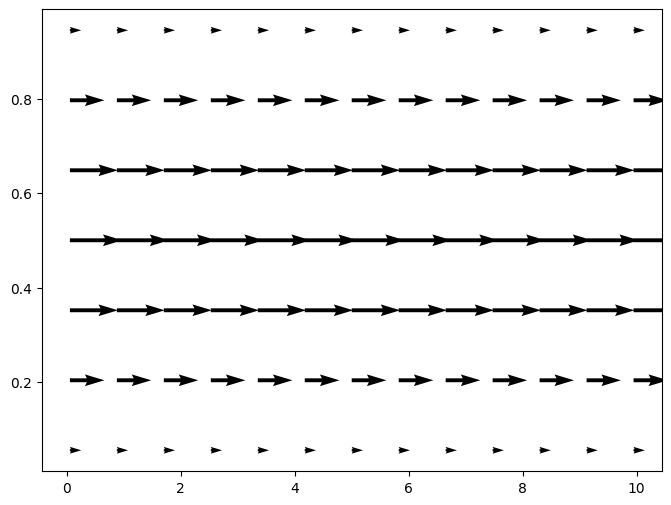

In [35]:
ux = beta*tps_rbf(euclidian_dist_int) @ result.x[:N+M]
#ux2 = beta*tps_rbf(euclidian_dist_int) @ resultado2.x[:N+M]
uy = tps_rbf(euclidian_dist_int) @ result.x[N+M:2*(N+M)]
#uy2 = tps_rbf(euclidian_dist_int) @ resultado2.x[N+M:2*(N+M)]
print(ux.shape)
#p3 = tps_rbf(euclidian_dist_int) @ resultado3.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xin, Yin, ux.reshape(px-2,py-2).T, uy.reshape(px-2,py-2).T)
#ax.quiver(Xin, Yin, ux2.reshape(px-2,py-2).T, uy2.reshape(px-2,py-2).T,color = 'red')

1849.9034534562215


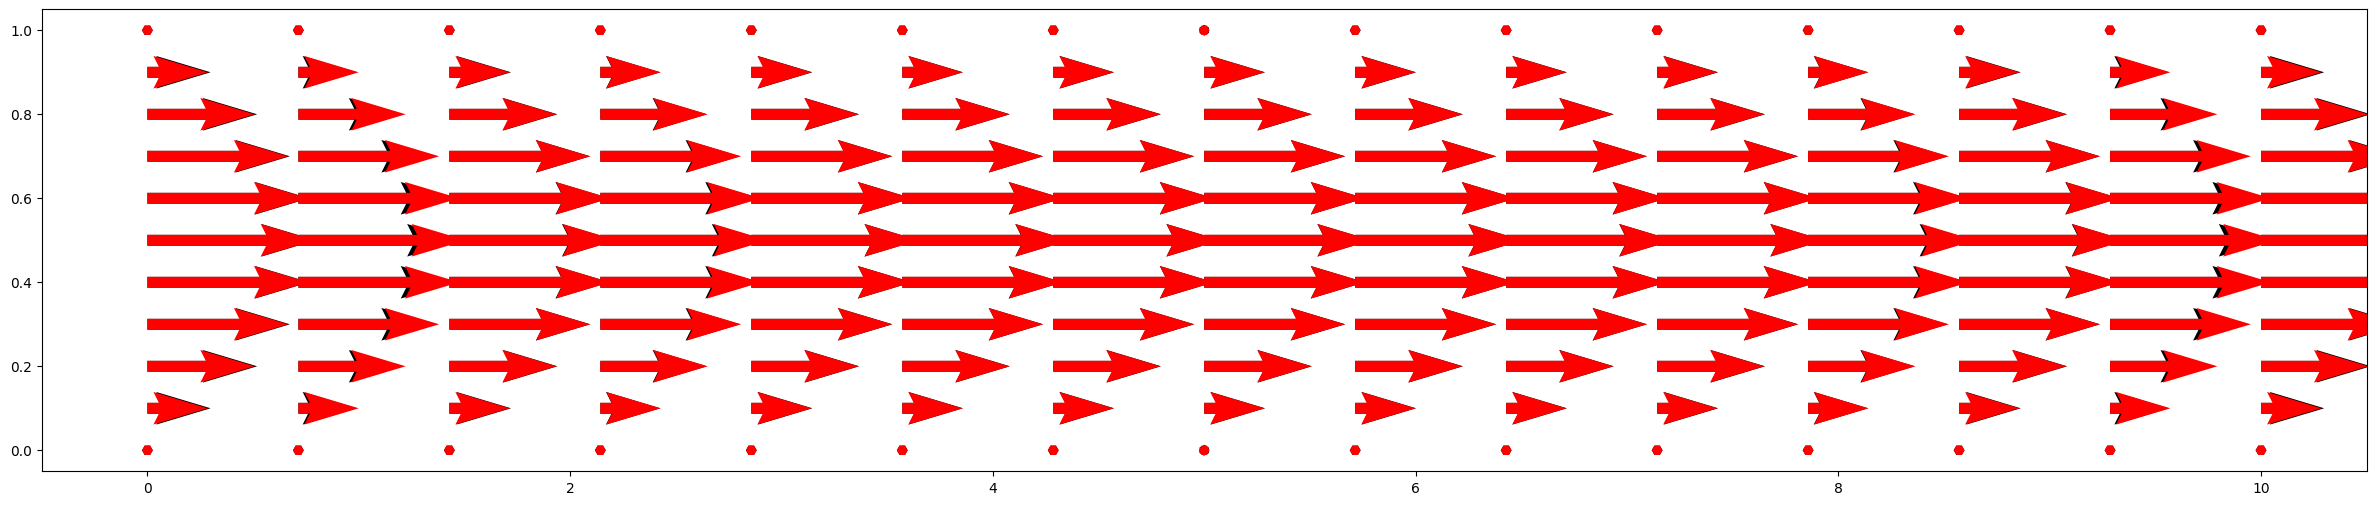

In [36]:
ux = beta*tps_rbf(euclidian_dist_test) @ result.x[:N+M]
uy = tps_rbf(euclidian_dist_test) @ result.x[N+M:2*(N+M)]
#ux2 = beta*tps_rbf(euclidian_dist_test) @ resultado2.x[:N+M]
#uy2 = tps_rbf(euclidian_dist_test) @ resultado2.x[N+M:2*(N+M)]
#p3 = tps_rbf(euclidian_dist_test) @ resultado3.x[2*(N+M):3*(N+M)]
#print(np.max(uy2))
fig, ax = plt.subplots(1, 1, figsize=(30,6))
ax.quiver(Xt, Yt, ux.reshape(tx,ty).T, uy.reshape(tx,ty).T)
#ax.quiver(Xt, Yt, ux2.reshape(tx,ty).T, uy2.reshape(tx,ty).T,color = 'green')
ax.quiver(Xt, Yt, -pm/2*Re*(Yt**2 - Ly*Yt), 0, color = 'red')
#print(np.max(ux2))
print(np.max(ux))

ERROR Medio ux1: 1.2872738316517176 %
Error Maximo ux1 2.868829228373368 %
V numérico maximo ux1 1849.9034534562215
V analitico maximo ux 1875.0
Error medio total ux1 1.9362904515759034 %


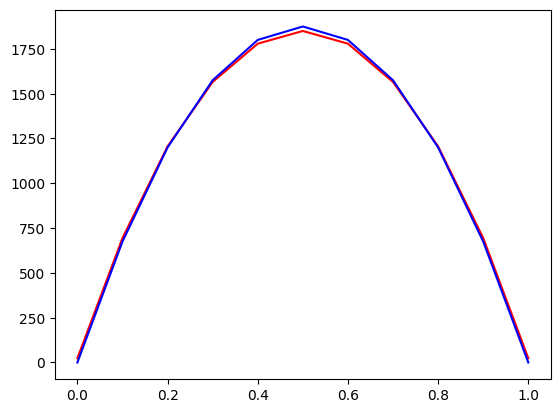

In [37]:
ppp = -1
print("ERROR Medio ux1:",np.mean( np.abs((ux.reshape(tx,ty).T[1:-1,ppp] - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
print("Error Maximo ux1", np.max( np.abs((ux.reshape(tx,ty).T[1:-1,ppp] - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
print("V numérico maximo ux1", np.max(ux.reshape(tx,ty).T[1:-1,ppp]))
print("V analitico maximo ux", np.max(-Re*pm/2*(y_test**2 - Ly*y_test)[1:-1]))
e = np.mean([np.mean( np.abs((ux.reshape(tx,ty).T[1:-1,i] - (-pm/2*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-pm/2*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100 for i in range(1,ty-1)])
print("Error medio total ux1",e, "%")
#print("ERROR Medio ux2:",np.mean( np.abs((ux2.reshape(tx,ty).T[1:-1,ppp] - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
#print("Error Maximo ux2", np.max( np.abs((ux2.reshape(tx,ty).T[1:-1,ppp] - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
#print("V numérico maximo ux2", np.max(ux2.reshape(tx,ty).T[1:-1,ppp]))
plt.plot(y_test,ux.reshape(tx,ty).T[:,ppp] , color = 'red')
#plt.plot(y_test,ux2.reshape(tx,ty).T[:,ppp] , color = 'black')
plt.plot(y_test,-Re*pm/2*(y_test**2 - Ly*y_test), color = 'blue')

In [30]:
NavierStokess_autograd(weightss).shape

(367,)

In [99]:
import numpy as np
from scipy.optimize._numdiff import approx_derivative  # Correct import path

# Assuming `NavierStokess`, `x0`, `N`, `M` are defined
x0 = np.zeros(2 * (N + M))  # Adjust shape to match your problem

# Compute the Jacobian numerically
J = approx_derivative(NavierStokess, x0, method='3-point')

# Compute SVD and condition number
U, s, Vh = np.linalg.svd(J, full_matrices=False)
condition_number = s.max() / s.min()

print(f"Singular values: {s}")
print(f"Condition number: {condition_number:.2e}")

Singular values: [2.04312072e+05 2.03187826e+05 1.99679900e+05 1.98424390e+05
 1.90860314e+04 1.83524034e+04 1.05553256e+04 9.49401918e+03
 8.02740165e+03 7.86081746e+03 2.13661635e+03 1.97557069e+03
 1.94457260e+03 1.77712910e+03 1.57386024e+03 3.30644876e+02
 2.60281303e+02 2.25075716e+02 2.24084397e+02 1.25620745e+02
 1.19273191e+02 9.29340288e+01 9.10603827e+01 4.91743919e+01
 4.08283921e+01 3.95864705e+01 3.35959336e+01 2.67460913e+01
 2.06706636e+01 1.84743324e+01 1.78328297e+01 1.54602092e+01
 1.42657446e+01 9.84527617e+00 9.71525952e+00 7.41379838e+00
 7.14897726e+00 6.68703135e+00 6.11398230e+00 5.47655208e+00
 4.42217233e+00 4.26564613e+00 4.18432261e+00 3.62844503e+00
 3.08873107e+00 3.06963686e+00 2.67957003e+00 2.55071980e+00
 2.49394936e+00 2.14974647e+00 2.09818545e+00 1.98408379e+00
 1.77806841e+00 1.71188623e+00 1.56081167e+00 1.53677470e+00
 1.30818711e+00 1.25901651e+00 1.01370130e+00 1.01316532e+00
 9.99292200e-01 8.18448020e-01 8.14678973e-01 7.07364906e-01
 7.0629

In [31]:

s = np.linalg.svd(J, compute_uv=False)
print("Smallest singular value:", s.min())
print("Largest singular value:", s.max())
print("Condition number:", s.max() / s.min())

Smallest singular value: 6.660809885294909e-09
Largest singular value: 168974.16211733138
Condition number: 25368410903060.926


In [31]:
a = NavierStokess(weightss)
a
#print("Max = ",np.max(np.abs(a)), "\n", "Min = ", np.min(np.abs(a)), "\n", "Mean = ", np.mean(np.abs(a)), "\n", "Std = ", np.std(np.abs(a)))
#print(np.where(np.abs(a) > 1e3))

array([-0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
       -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0. 

In [ ]:
#import scipy.optimize as opti
from scipy.optimize import least_squares

Re = 100

# Define el vector inicial
x0 = 0*(weightss.reshape(-1) ) # tamaño_total = tamaño del vector weights
#print( NavierStokess(weights3).shape[0] >= x0.shape[0])
# Llamas al solucionador
#resultado2 = opti.root(NavierStokess, x0, args = (), method = 'lm', jac = None , tol = None, callback = None, options = {'col_deriv': 0, 'xtol': 1.49012e-14,'ftol': 1.49012e-14,'gtol':0.0, 'maxiter': 0, 'eps': 0.0, 'factor': 100, 'diag': None})
resultado = least_squares(NavierStokess_square, x0,  method='lm' ,verbose = 2)  
#resultado2 = fsolve(NavierStokess, x0,args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
#resultado2 = root(NavierStokess_square, x0,args=(), method='lm')#, jac=None, tol=None, callback=None,options={'col_deriv': 0, 'xtol': 1.49012e-14, 'ftol': 1.49012e-14, 'gtol': 0.0, 'maxiter': 0, 'eps': 0.0, 'factor': 100, 'diag': None})

`xtol` termination condition is satisfied.
Function evaluations 398, initial cost 3.8500e-03, final cost 2.5066e-08, first-order optimality 3.70e-02.


In [77]:
#from scipy.optimize import least_squares
from scipy.optimize import fsolve
Re = 1100
# Define el vector inicial
x0 = (resultado2.x.reshape(-1) )#+ np.random.rand(resultado2.x.shape[0])*np.mean(resultado2.x)*10) # tamaño_total = tamaño del vector weights
print( NavierStokess(weightss).shape[0] >= x0.shape[0])
# Llamas al solucionador

resultado2 = least_squares(NavierStokess, x0, method='lm',verbose = 2)
print(weightss.shape)
NavierStokess(weightss).shape
#resultato3 = fsolve(NavierStokess, x0)

True


KeyboardInterrupt: 

In [32]:
np.where(NavierStokess(resultado2.x) > 1)
#NavierStokess(resultado2.x)
NavierStokess(resultado2.x).shape

NameError: name 'resultado2' is not defined

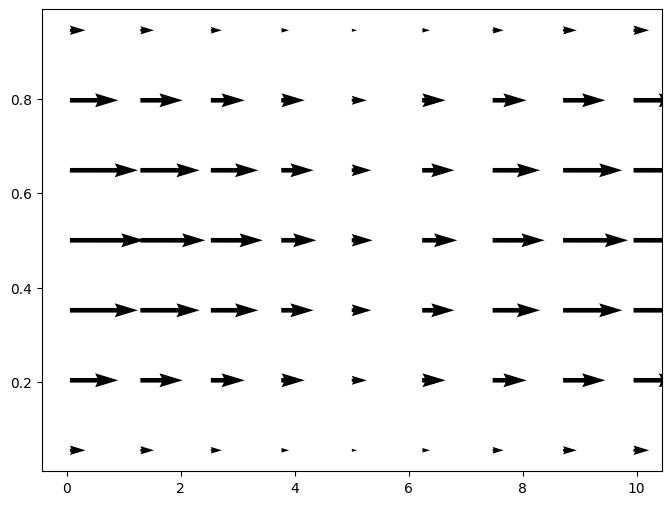

In [ ]:
ux = beta*tps_rbf(euclidian_dist_int) @ resultado.x[:N+M]
uy = tps_rbf(euclidian_dist_int) @ resultado.x[N+M:2*(N+M)]

ux2 = beta*tps_rbf(euclidian_dist_int) @ resultado2.x[:N+M]
uy2 = tps_rbf(euclidian_dist_int) @ resultado2.x[N+M:2*(N+M)]
#p3 = tps_rbf(euclidian_dist_int) @ resultado3.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xin, Yin, ux2.reshape(px-2,py-2).T, uy2.reshape(px-2,py-2).T)

np.float64(150.24370863227978)

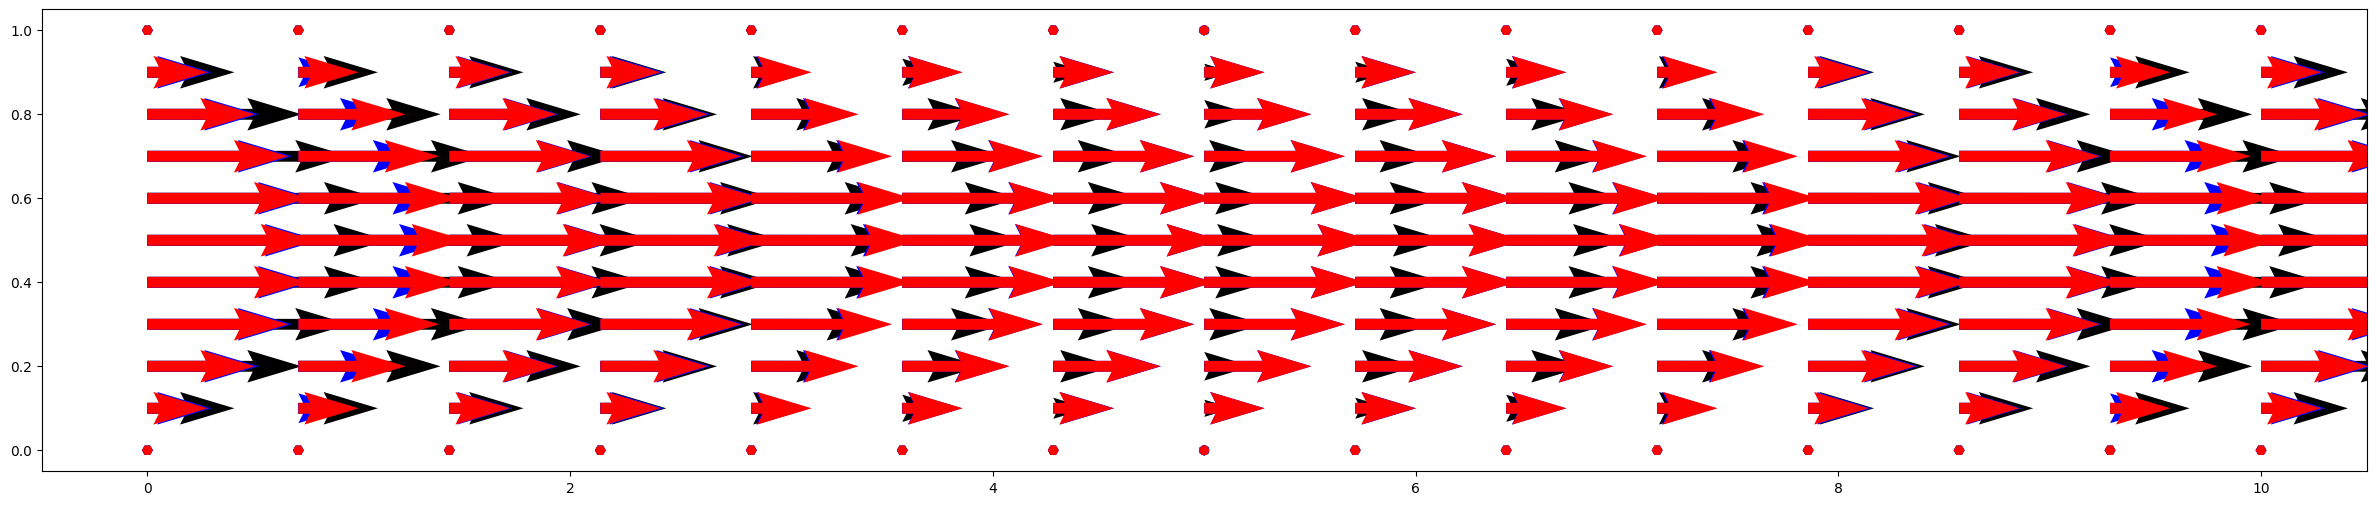

In [48]:
ux = beta*tps_rbf(euclidian_dist_test) @ resultado.x[:N+M]
uy = tps_rbf(euclidian_dist_test) @ resultado.x[N+M:2*(N+M)]


ux2 = beta*tps_rbf(euclidian_dist_test) @ resultado2.x[:N+M]
uy2 = tps_rbf(euclidian_dist_test) @ resultado2.x[N+M:2*(N+M)]
#p3 = tps_rbf(euclidian_dist_test) @ resultado3.x[2*(N+M):3*(N+M)]
#print(np.max(uy2))
fig, ax = plt.subplots(1, 1, figsize=(30,6))
ax.quiver(Xt, Yt, ux2.reshape(tx,ty).T, uy2.reshape(tx,ty).T)
ax.quiver(Xt, Yt, ux.reshape(tx,ty).T, uy.reshape(tx,ty).T, color = 'blue')
ax.quiver(Xt, Yt, -pm/2*Re*(Yt**2 - Ly*Yt), 0, color = 'red')
np.max(ux2)

ERROR Medio: 20.41749210689983 %
Error Maximo 20.831498969584814 %
V numérico maximo 150.24370863227978
V analitico maximo 125.0
Error medio total 32.34564586911698 %


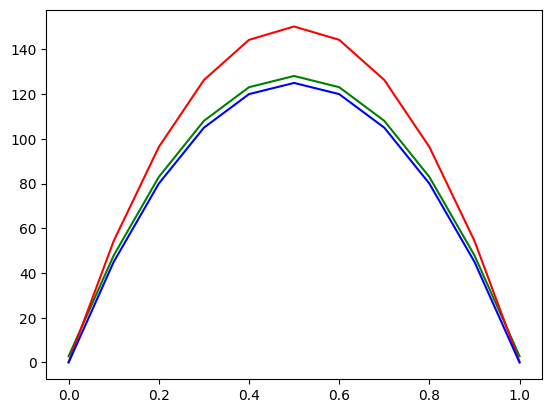

In [49]:
ppp = 0
print("ERROR Medio:",np.mean( np.abs((ux2.reshape(tx,ty).T[1:-1,ppp] - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
print("Error Maximo", np.max( np.abs((ux2.reshape(tx,ty).T[1:-1,ppp] - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
print("V numérico maximo", np.max(ux2.reshape(tx,ty).T[1:-1,ppp]))
print("V analitico maximo", np.max(-Re*pm/2*(y_test**2 - Ly*y_test)[1:-1]))
e = np.mean([np.mean( np.abs((ux2.reshape(tx,ty).T[1:-1,i] - (-pm/2*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-pm/2*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100 for i in range(1,ty-1)])
print("Error medio total",e, "%")
plt.plot(y_test,ux.reshape(tx,ty).T[:,ppp] , color = 'green')
plt.plot(y_test,ux2.reshape(tx,ty).T[:,ppp] , color = 'red')
plt.plot(y_test,-Re*pm/2*(y_test**2 - Ly*y_test), color = 'blue')

In [170]:
def NavierStokessUP(weights):
        
    wx = weights[:((N+M))].reshape(-1,1)
    wy = weights[((N+M)):2*((N+M))].reshape(-1,1)
    wp = weights[2*((N+M)):3*((N+M))].reshape(-1,1)
    wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
    wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
    wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
    wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    #weights = np.concatenate((wx,wxiwxj,wyiwxj,wy,wxiwyj,wyiwyj),axis = 0)
    #print(wp[-1])
    
    F = np.zeros(((3*N+ 6*(M_4x) + 6*(M_4y)),))
    #Ecuaiones diferenciales en puntos internos
        #Ecuacion en x
    F[0:N] +=  1*( 1/Re*(-np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) + Eu*np.dot(gx_int,wp) + np.dot(phidphidx,wxiwxj) + np.dot(phidphidy,wyiwxj)).flatten()/(F_01)
        #   Ecuacione en y
    F[N:2*N] += ( 1/Re*(-np.dot(gxx_int,wy) - np.dot(gyy_int,wy)) + Eu*np.dot(gy_int,wp) + np.dot(phidphidx,wxiwyj) + np.dot(phidphidy,wyiwyj)).flatten()/F_02
        #Ecuacion de continuidad
    F[2*N:3*N] += 50*(np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()/F_03
    
    #Condiciones de frontera
    
        # Condiciones de ux
    F[3*N  : 3*N +  M_4x] = 1*( np.dot( gb2 , wx ) ).flatten()/F_04
    F[3*N + ( M_4x): 3*N + 2 * ( M_4x)] = 1*(np.dot(gb1,wx)).flatten()/F_05
    F[3*N + 2 * ( M_4x ):3*N + 2 * ( M_4x ) + (M_4y)] = 5*(np.dot(gb3,wx) - 10.0).flatten()/F_06
    
    
        #Condiciones de uy
    F[3*N + 2 * ( M_4x) + M_4y : 3*N + 3 * ( M_4x ) + M_4y] = 1*(np.dot(gb2,wy)).flatten()/F_07
    F[3*N + 3 * ( M_4x ) + M_4y:3*N + 4 * ( M_4x ) + M_4y] = 1*(np.dot(gb1,wy)).flatten()/F_08
    F[3*N + 4 * ( M_4x ) + M_4y:3*N + 4 * ( M_4x ) + 2 * (M_4y)] = 5*(np.dot(gb3,wy)).flatten()/F_09
    
        #Condiciones de p
    F[3*N + 4 * ( M_4x ) + 2 * (M_4y):3*N + 4 * ( M_4x ) + 3 * (M_4y)] = 1*(np.dot(gb3,wp)).flatten()/F_010
    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida
    F[ 3*N + 4 * ( M_4x ) + 3 * (M_4y) :  3*N + 4 * ( M_4x ) + 4 * (M_4y)] = 10*(np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()/F_011
    F[3*N + 4 * ( M_4x ) + 4 * (M_4y):3*N + 4 * ( M_4x ) + 5 * (M_4y)] = 10*(np.dot(gx_b4,wy)).flatten()/F_012
    F[3*N + 4 * ( M_4x ) + 5 * (M_4y):3*N + 4 * ( M_4x ) + 6 * (M_4y)] = 10*( 1/Re*(-np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) + Eu*np.dot(gx_b4,wp) + np.dot(phidphidx_b4,wxiwxj) + np.dot(phidphidy_b4,wyiwxj)).flatten()/F_013
        #Ecuacion en frontera superior
    F[3*N + 4 * ( M_4x ) + 6 * (M_4y):3*N + 5 * ( M_4x ) + 6 * (M_4y) ] = 10*( 1/Re*(-np.dot(gxx_b2,wy) - np.dot(gyy_b2,wy)) + Eu*np.dot(gy_b2,wp)).flatten()/F_014
        #Ecuacion en frontera inferior
    F[3*N + 5 * ( M_4x ) + 6 * (M_4y):3*N + 6 * ( M_4x ) + 6 * (M_4y)] = 10*( 1/Re*(-np.dot(gxx_b1,wy) - np.dot(gyy_b1,wy)) + Eu*np.dot(gy_b1,wp)).flatten()/F_015
    return F#,F.shape
    
    

In [171]:
#np.where(NavierStokessUP(weights3) == 0)
NavierStokessUP(weights3).shape[0]
weights3.reshape(-1).shape[0]
x0 = (weights3.reshape(-1) ) # tamaño_total = tamaño del vector weights
print( NavierStokessUP(weights3).shape[0] >= x0.shape[0])
#np.where(NavierStokessUP(weights3) == 0)

True


In [180]:
from scipy.optimize import least_squares
Re = 10
#weights3 = 0*np.random.rand(3*(N+M),1).reshape(-1,1)/(3*(N+M)) 
#weights3[:2*(N+M)] = resultado2.x.reshape(-1,1)/(2*(N+M))
# Define el vector inicial
x0 = (0*weights3.reshape(-1) ) # tamaño_total = tamaño del vector weights
print( NavierStokessUP(weights3).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado3 = least_squares(NavierStokessUP, x0, method='lm', verbose = 2) 

True
`xtol` termination condition is satisfied.
Function evaluations 3556, initial cost 1.6279e-03, final cost 1.9168e-05, first-order optimality 1.97e-02.


In [181]:
resultado3.x[:N+M] ** 2

array([1.06368247e+02, 1.94540608e+02, 1.79080250e+01, 3.45567744e-01,
       1.79849675e+01, 1.95229509e+02, 1.06758758e+02, 4.89150808e+01,
       5.24563295e+00, 4.22540308e+01, 1.12688044e+02, 4.22899559e+01,
       5.24641972e+00, 4.90112660e+01, 7.86282461e-02, 6.76436573e+00,
       3.69463493e-01, 7.37081213e-01, 3.65598654e-01, 6.73738311e+00,
       8.05926970e-02, 1.47984454e-01, 2.36141024e+00, 5.69712884e-01,
       2.16221648e-02, 6.01142124e-01, 2.43938029e+00, 1.48972240e-01,
       4.10495742e-03, 4.66937230e-01, 2.95018432e-03, 9.92754559e-02,
       4.04100482e-03, 4.82307493e-01, 4.11014861e-03, 2.44599000e-01,
       2.78478017e-01, 2.32091861e-01, 9.86014328e-01, 2.14532198e-01,
       2.81178115e-01, 2.33721186e-01, 1.18578912e-01, 2.37229274e-02,
       1.16833346e-01, 1.38337832e-02, 1.25893984e-01, 1.81881077e-02,
       1.15452549e-01, 2.36610427e-01, 4.24469791e-03, 3.49310558e-01,
       7.93824893e-01, 3.64022212e-01, 5.89529898e-03, 2.52992394e-01,
      

In [112]:
from scipy.optimize import least_squares

# Define el vector inicial
x0 = 0*(resultado3.x.reshape(-1) + np.random.rand(resultado3.x.shape[0])*np.mean(resultado3.x)*0.1 ) # tamaño_total = tamaño del vector weights

print( NavierStokessUP(x0).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado3_1 = least_squares(NavierStokessUP, x0, method='lm', verbose = 2) 

True
`xtol` termination condition is satisfied.
Function evaluations 3950, initial cost 3.5000e+02, final cost 4.9100e-01, first-order optimality 6.27e+03.


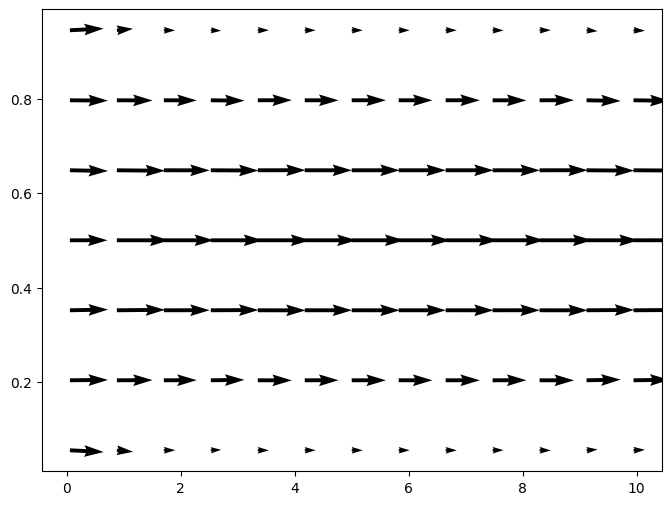

In [191]:
ux3 = 1*tps_rbf(euclidian_dist_int) @ resultado3.x[:N+M]
uy3 = tps_rbf(euclidian_dist_int) @ resultado3.x[N+M:2*(N+M)]
p3 = tps_rbf(euclidian_dist_int) @ resultado3.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xin, Yin, ux3.reshape(px-2,py-2).T, uy3.reshape(px-2,py-2).T)

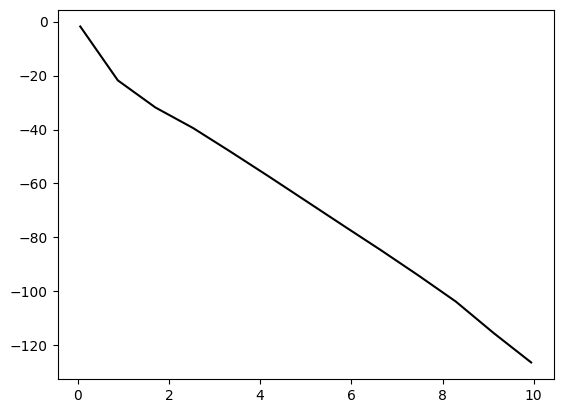

In [192]:
plt.plot(x_int,p3.reshape(px-2,py-2).T[1,:],color = 'black')

ERROR: 12.000771631728073 %
Vmaximo numérico 13.685523137082782
Vmaximo analítico 15.591964827080457


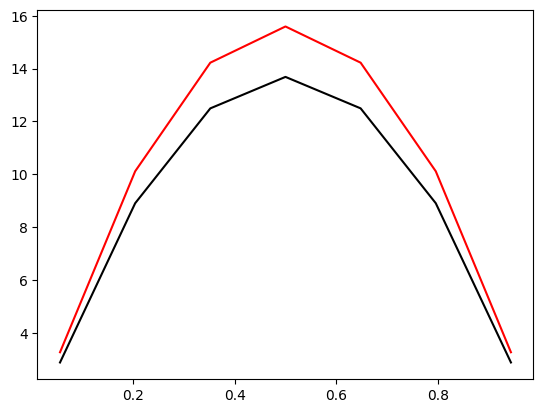

In [193]:
PPP = 5
print("ERROR:",np.mean( np.abs((ux3.reshape(px-2,py-2).T[:,PPP] - (-Re/2*(p3[0] - p3[-1])/Lx*(y_int**2 - Ly*y_int))) /( -Re/2*(p3[0] - p3[-1])/Lx*(y_int**2 - Ly*y_int)   )  ) ) *100,'%')
print("Vmaximo numérico", np.max(ux3.reshape(px-2,py-2).T[:,PPP]))
print("Vmaximo analítico", np.max(-Re/2*(p3[0] - p3[-1])/Lx*(y_int**2 - Ly*y_int)))
plt.plot(y_int,ux3.reshape(px-2,py-2).T[:,PPP],color = 'black')
plt.plot(y_int, -Re/2*(p3[0] - p3[-1])/(Lx)*(y_int**2 - Ly*y_int),color = 'red')

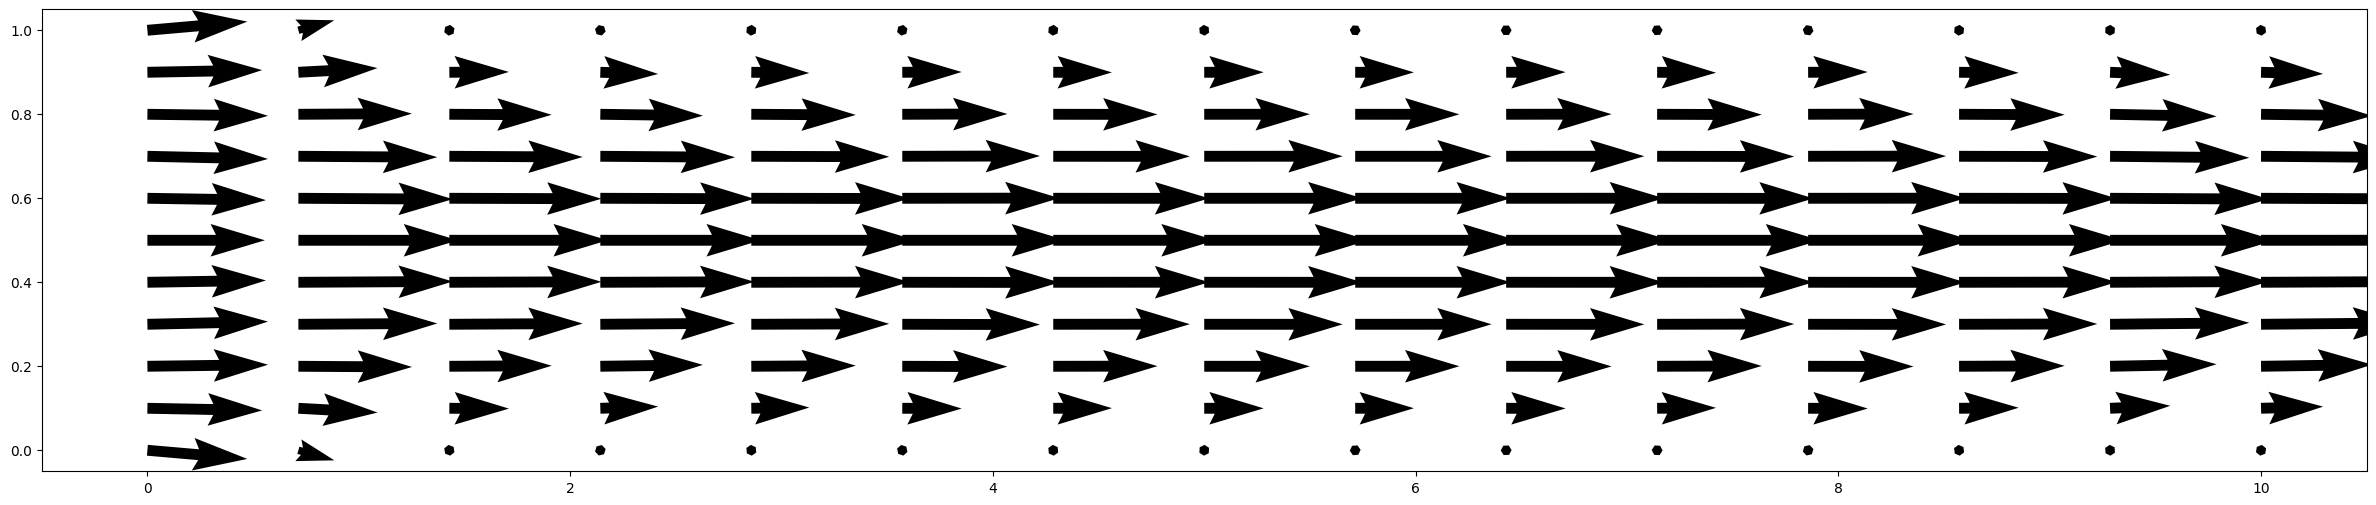

In [194]:
ux3 = 1*tps_rbf(euclidian_dist_test) @ resultado3.x[:N+M]
uy3 = tps_rbf(euclidian_dist_test) @ resultado3.x[N+M:2*(N+M)]
p3 = tps_rbf(euclidian_dist_test) @ resultado3.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(30,6))
ax.quiver(Xt, Yt, ux3.reshape(tx,ty).T, uy3.reshape(tx,ty).T)

In [186]:
p3[0] - p3[-1]

np.float64(127.3062188329547)

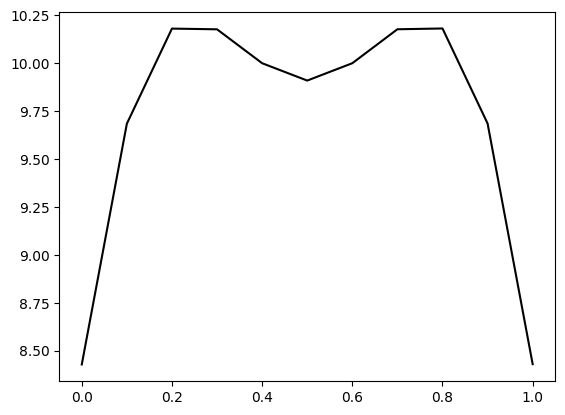

In [187]:
plt.plot(y_test,ux3.reshape(tx,ty).T[:,0],color = 'black')

In [ ]:
best_result = None
best_cost = np.inf
for i in range(10):
    print("Iteración número:", 1+i)
    x0_random = np.random.randn(*x0.shape) * 0.1  # small noise
    result = least_squares(NavierStokessUP, x0_random, method='trf',verbose=2)
    
    if result.cost < best_cost:
        best_cost = result.cost
        best_result = result

Iteración número: 1
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.8067e+07                                    3.02e+08    
       1              2         6.7573e+03      9.81e+07       1.87e+00       2.12e+05    
       2              3         1.6036e+01      6.74e+03       3.75e+00       5.43e+03    
       3              4         4.2631e-04      1.60e+01       7.50e+00       1.84e+01    
       4              5         1.6975e-06      4.25e-04       1.50e+01       2.71e+01    
       5              6         2.9415e-07      1.40e-06       3.00e+01       7.72e+00    
       6             10         2.3309e-07      6.11e-08       9.37e-01       9.07e-01    
       7             11         1.9698e-07      3.61e-08       9.37e-01       1.43e+00    
       8             12         1.9188e-07      5.10e-09       9.37e-01       1.69e+00    
       9             13         1.8369e-07      8.18e-09       2.34e-0

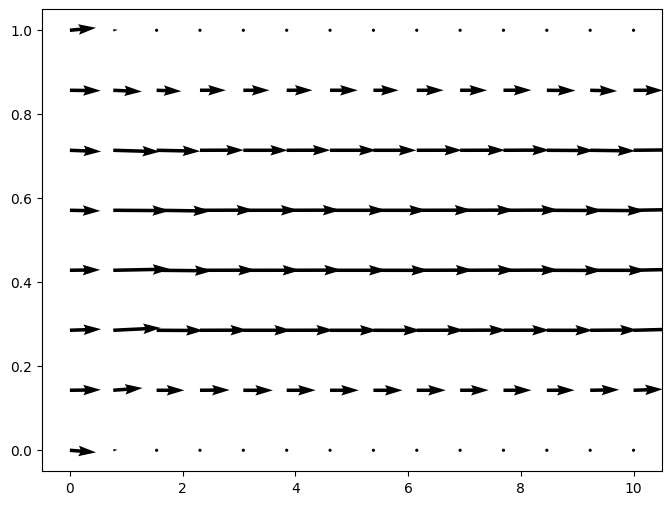

In [ ]:
ux33 = tps_rbf(euclidian_dist_complete) @ best_result.x[:N+M]
uy33 = tps_rbf(euclidian_dist_complete) @ best_result.x[N+M:2*(N+M)]
p33 = tps_rbf(euclidian_dist_complete) @ best_result.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(X, Y, ux33.reshape(px,py).T, uy33.reshape(px,py).T)
#plt.plot(y_int,p33.reshape(px-2,py-2).T[:,0],color = 'black')

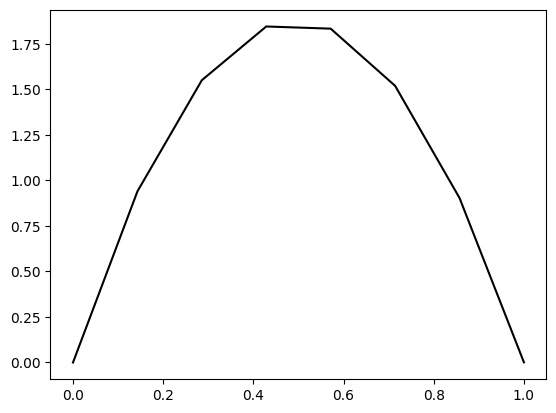

In [ ]:
plt.plot(y,ux33.reshape(px,py).T[:,6],color = 'black')

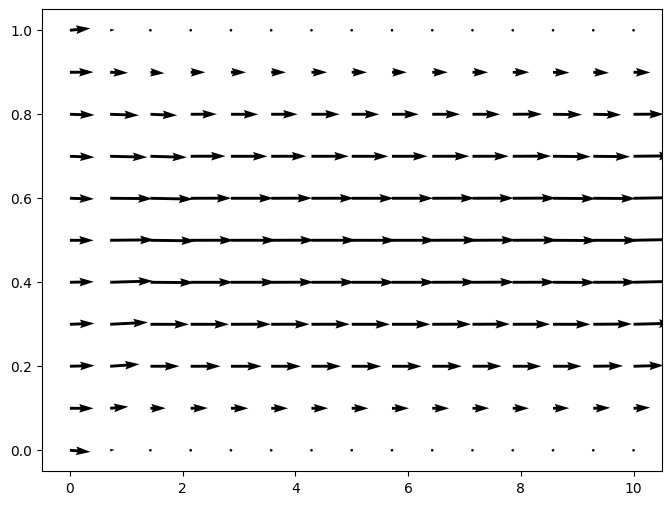

In [ ]:
ux33 = tps_rbf(euclidian_dist_test) @ best_result.x[:N+M]
uy33 = tps_rbf(euclidian_dist_test) @ best_result.x[N+M:2*(N+M)]
p33 = tps_rbf(euclidian_dist_test) @ best_result.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xt, Yt, ux33.reshape(tx,ty).T, uy33.reshape(tx,ty).T)


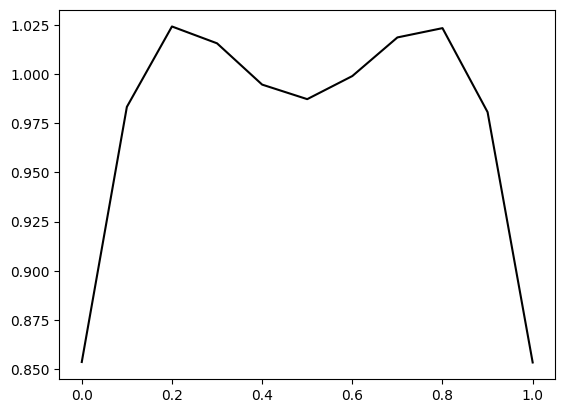

In [ ]:
plt.plot(y_test,ux33.reshape(tx,ty).T[:,0],color = 'black')

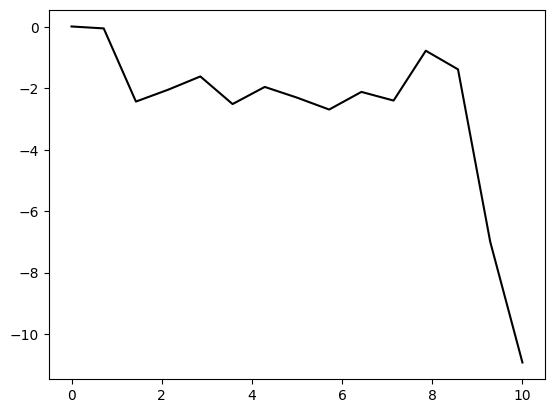

In [ ]:
plt.plot(x_test, p33.reshape(tx,ty).T[0,:],color = 'black')

(190,)

In [77]:
X = Matrix([rho*cos(phi), rho*sin(phi), rho**2])
Y = Matrix([rho, phi])
X.shape
Y.shape
#X.jacobian(Y)

(2, 1)